# Linear regression demo (v0.6)

*Denis Schluppeck* - 2017

Interactive demonstration of linear regression with some timeseries data.

## Plan

- load some data (timecourse)
- load a model (design matrix in 3 columns)
- inspect, plot and then use some interactivity to show how it works

The first 10 elements of this list of numbers:

In [1]:
# using IJulia; # not necessary
using PyPlot;
using Interact;

In [2]:
# set up. read the data, design, make a time vector
timecourse = readdlm("timecourse.txt", ',', Float64);
design = readdlm("design-3.txt", ',', Float64);
t = (0:167)*1.5;

In [3]:
timecourse[1:10]

10-element Array{Float64,1}:
 213.0
 200.0
 201.0
 208.0
 207.0
 202.0
 203.0
 194.0
 190.0
 190.0

The first 10 elements of our model description:

In [4]:
design[1:10,:]

10×3 Array{Float64,2}:
  0.0      1.0  -1.0  
  0.0      1.0  -0.988
  0.0      1.0  -0.976
  0.0      1.0  -0.964
  0.0      1.0  -0.952
  0.0      1.0  -0.94 
  0.0      1.0  -0.928
  0.0      1.0  -0.916
 -1.0      1.0  -0.904
 -0.71335  1.0  -0.892

## Simple plot

This is a timeseries where:   

``t`` $\rightarrow$ x values and

``timecourse`` $\rightarrow$ y-values 

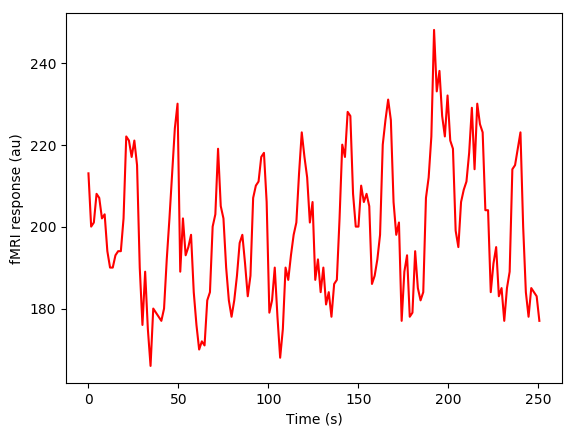

In [5]:
plot(t, timecourse, "r");
xlabel("Time (s)"); ylabel("fMRI response (au)");

In [6]:
# setting up a julia expression that can be called on one line...
demoRegressFunction = :( h = figure(); δ=16; @manipulate for a=-δ:1:δ, b=150:1:300, c=-δ:δ; withfig(h) do 
        plot(t, timecourse, color="red"), plot(t, design*[a;b;c], color="black"), axis([0, 250, 100, 300]); xlabel("Time (s)"); ylabel("fMRI reponse (image intensity)");
        sse = sum((timecourse-design*[a;b;c]).^2);
        title(sse)
    end
end) ;

In [7]:
demoFunction1 = :(f = figure();  @manipulate for a=-2:0.1:2, b=-2:0.1:2, c=-1:0.1:1; withfig(f) do 
        plot(t, a*design[:,1], t, b*design[:,2],  t, c*design[:,3]), axis([0, 250, -2, 2])
        end
end) ;

In [8]:
demoFunction2 = :( g = figure(); @manipulate for a=-2:0.1:2, b=-2:0.1:2, c=-1:0.1:1; withfig(g) do 
        plot(t, a*design[:,1] + b*design[:,2] + c*design[:,3]), axis([0, 250, -2, 2]);
        end
end );

There are **three** individual components of the model. 

Interact.Options{:SelectionSlider,Float64}(1: "input" = 0.0 Float64 , "a", 0.0, "0.0", Interact.OptionDict(DataStructures.OrderedDict("-2.0"=>-2.0,"-1.9"=>-1.9,"-1.8"=>-1.8,"-1.7"=>-1.7,"-1.6"=>-1.6,"-1.5"=>-1.5,"-1.4"=>-1.4,"-1.3"=>-1.3,"-1.2"=>-1.2,"-1.1"=>-1.1…), Dict(1.0=>"1.0",0.3=>"0.3",1.2=>"1.2",2.0=>"2.0",-0.2=>"-0.2",-1.0=>"-1.0",1.5=>"1.5",-1.3=>"-1.3",-0.3=>"-0.3",-0.6=>"-0.6"…)), Any[], Any[], true, "horizontal")

Interact.Options{:SelectionSlider,Float64}(3: "input-2" = 0.0 Float64 , "b", 0.0, "0.0", Interact.OptionDict(DataStructures.OrderedDict("-2.0"=>-2.0,"-1.9"=>-1.9,"-1.8"=>-1.8,"-1.7"=>-1.7,"-1.6"=>-1.6,"-1.5"=>-1.5,"-1.4"=>-1.4,"-1.3"=>-1.3,"-1.2"=>-1.2,"-1.1"=>-1.1…), Dict(1.0=>"1.0",0.3=>"0.3",1.2=>"1.2",2.0=>"2.0",-0.2=>"-0.2",-1.0=>"-1.0",1.5=>"1.5",-1.3=>"-1.3",-0.3=>"-0.3",-0.6=>"-0.6"…)), Any[], Any[], true, "horizontal")

Interact.Options{:SelectionSlider,Float64}(5: "input-3" = 0.0 Float64 , "c", 0.0, "0.0", Interact.OptionDict(DataStructures.OrderedDict("-1.0"=>-1.0,"-0.9"=>-0.9,"-0.8"=>-0.8,"-0.7"=>-0.7,"-0.6"=>-0.6,"-0.5"=>-0.5,"-0.4"=>-0.4,"-0.3"=>-0.3,"-0.2"=>-0.2,"-0.1"=>-0.1…), Dict(1.0=>"1.0",0.3=>"0.3",-0.2=>"-0.2",-1.0=>"-1.0",-0.3=>"-0.3",-0.6=>"-0.6",0.7=>"0.7",0.0=>"0.0",0.2=>"0.2",-0.1=>"-0.1"…)), Any[], Any[], true, "horizontal")

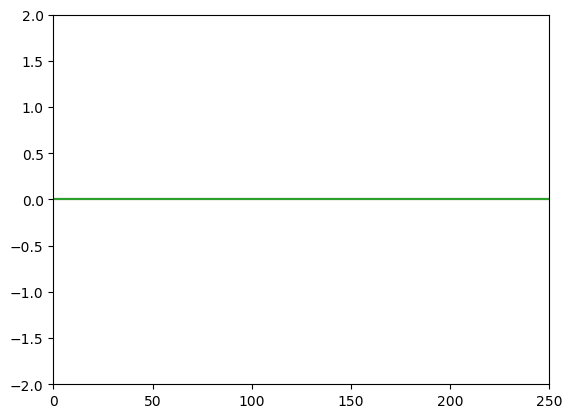

In [9]:
eval(demoFunction1)

At each point in time, they simply **add** to the final result. So let's look at the **linear combination** of these three components.

To make this clearer in your mind, it might help to think of another example of *timeseries* data, e.g. temperature measurements over time: 

Interact.Options{:SelectionSlider,Float64}(9: "input-4" = 0.0 Float64 , "a", 0.0, "0.0", Interact.OptionDict(DataStructures.OrderedDict("-2.0"=>-2.0,"-1.9"=>-1.9,"-1.8"=>-1.8,"-1.7"=>-1.7,"-1.6"=>-1.6,"-1.5"=>-1.5,"-1.4"=>-1.4,"-1.3"=>-1.3,"-1.2"=>-1.2,"-1.1"=>-1.1…), Dict(1.0=>"1.0",0.3=>"0.3",1.2=>"1.2",2.0=>"2.0",-0.2=>"-0.2",-1.0=>"-1.0",1.5=>"1.5",-1.3=>"-1.3",-0.3=>"-0.3",-0.6=>"-0.6"…)), Any[], Any[], true, "horizontal")

Interact.Options{:SelectionSlider,Float64}(11: "input-5" = 0.0 Float64 , "b", 0.0, "0.0", Interact.OptionDict(DataStructures.OrderedDict("-2.0"=>-2.0,"-1.9"=>-1.9,"-1.8"=>-1.8,"-1.7"=>-1.7,"-1.6"=>-1.6,"-1.5"=>-1.5,"-1.4"=>-1.4,"-1.3"=>-1.3,"-1.2"=>-1.2,"-1.1"=>-1.1…), Dict(1.0=>"1.0",0.3=>"0.3",1.2=>"1.2",2.0=>"2.0",-0.2=>"-0.2",-1.0=>"-1.0",1.5=>"1.5",-1.3=>"-1.3",-0.3=>"-0.3",-0.6=>"-0.6"…)), Any[], Any[], true, "horizontal")

Interact.Options{:SelectionSlider,Float64}(13: "input-6" = 0.0 Float64 , "c", 0.0, "0.0", Interact.OptionDict(DataStructures.OrderedDict("-1.0"=>-1.0,"-0.9"=>-0.9,"-0.8"=>-0.8,"-0.7"=>-0.7,"-0.6"=>-0.6,"-0.5"=>-0.5,"-0.4"=>-0.4,"-0.3"=>-0.3,"-0.2"=>-0.2,"-0.1"=>-0.1…), Dict(1.0=>"1.0",0.3=>"0.3",-0.2=>"-0.2",-1.0=>"-1.0",-0.3=>"-0.3",-0.6=>"-0.6",0.7=>"0.7",0.0=>"0.0",0.2=>"0.2",-0.1=>"-0.1"…)), Any[], Any[], true, "horizontal")

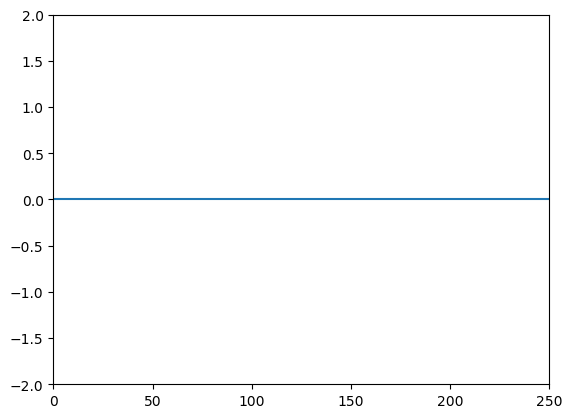

In [10]:
eval(demoFunction2)

Adjust sliders to make the **black curve** (model) fit as closely to the **red curve** data as possible.

Interact.Options{:SelectionSlider,Int64}(17: "input-7" = 0 Int64 , "a", 0, "0", Interact.OptionDict(DataStructures.OrderedDict("-16"=>-16,"-15"=>-15,"-14"=>-14,"-13"=>-13,"-12"=>-12,"-11"=>-11,"-10"=>-10,"-9"=>-9,"-8"=>-8,"-7"=>-7…), Dict(-16=>"-16",2=>"2",-11=>"-11",-1=>"-1",16=>"16",-7=>"-7",11=>"11",-15=>"-15",0=>"0",7=>"7"…)), Any[], Any[], true, "horizontal")

Interact.Options{:SelectionSlider,Int64}(19: "input-8" = 225 Int64 , "b", 225, "225", Interact.OptionDict(DataStructures.OrderedDict("150"=>150,"151"=>151,"152"=>152,"153"=>153,"154"=>154,"155"=>155,"156"=>156,"157"=>157,"158"=>158,"159"=>159…), Dict(210=>"210",288=>"288",241=>"241",267=>"267",275=>"275",197=>"197",158=>"158",215=>"215",160=>"160",170=>"170"…)), Any[], Any[], true, "horizontal")

Interact.Options{:SelectionSlider,Int64}(21: "input-9" = 0 Int64 , "c", 0, "0", Interact.OptionDict(DataStructures.OrderedDict("-16"=>-16,"-15"=>-15,"-14"=>-14,"-13"=>-13,"-12"=>-12,"-11"=>-11,"-10"=>-10,"-9"=>-9,"-8"=>-8,"-7"=>-7…), Dict(-16=>"-16",2=>"2",-11=>"-11",-1=>"-1",16=>"16",-7=>"-7",11=>"11",-15=>"-15",0=>"0",7=>"7"…)), Any[], Any[], true, "horizontal")

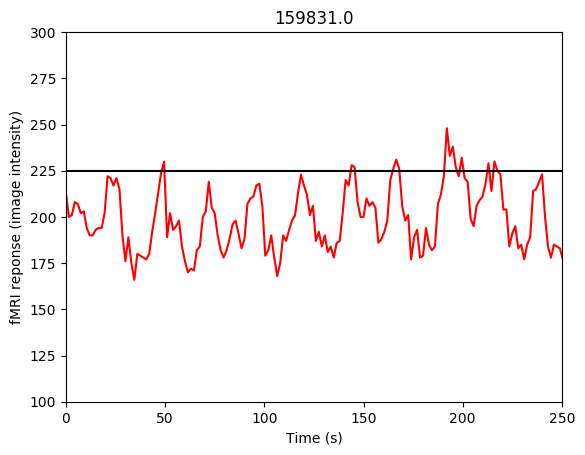

In [11]:
eval(demoRegressFunction)

## To find the best solution, least-squares! 

$\mathbf{y} = \mathbf{X}\mathbf{b} + \epsilon$ 

where y is data, X the design matrix ($\epsilon$ for additional noise)

$\mathbf{b} = \mathbf{X}^{\dagger}\,y$

In code this looks like this. Note the backslash ``\`` operator (not division) that solves the linear system to give you so-called $\beta$ weights



In [12]:
@show beta = design\timecourse;

beta = design \ timecourse = [13.0751; 199.244; 5.52676]


# Data and model on the same plot

The **model prediction** is just the **model** multiplied with the **weights** we found for each column. 

In [13]:
modelPrediction = design * beta; # model prediction

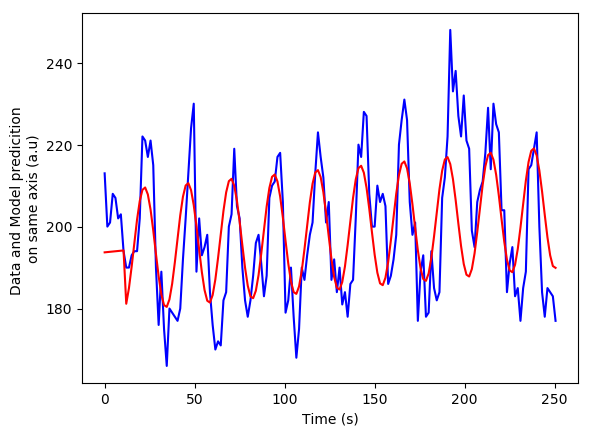

In [14]:
plot(t, timecourse, color="blue");
# hold(true) # deprecated
plot(t, modelPrediction, color="red"); xlabel("Time (s)"); 
ylabel("Data and Model predicition \non same axis (a.u)");

And a look at the **residuals**...

In [15]:
residual = timecourse - modelPrediction;

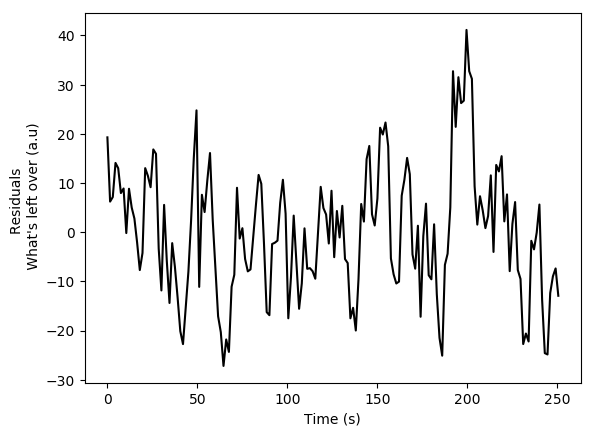

In [16]:
plot(t, residual, color="black");
xlabel("Time (s)"); 
ylabel("Residuals \n What's left over (a.u)");

## How good is the fit?

Can look at how much is left in the *residuals* 

$\rightarrow$ ``var(resdiuals)``    $\quad$  compared to the data 

$\rightarrow$ ``var(data)``

In [17]:
@show var(residual)
@show var(timecourse)
@show r2 = 1 - var(residual)./var(timecourse)

var(residual) = 174.14069342225005
var(timecourse) = 289.73050327915604
r2 = 1 - var(residual) ./ var(timecourse) = 0.3989563009371331


0.3989563009371331